In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import isnan
from pandas import read_csv
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import KNNImputer
from sklearn.decomposition import KernelPCA
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
import sys
np.set_printoptions(threshold=sys.maxsize)

plt.rcParams['figure.figsize']=[12,8]

In [3]:
data=pd.read_csv('house_data_set.csv')
data.head()

,Posted_On,BHK,Rent,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact,Rating
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,4


In [4]:
data.tail()

,Posted_On,BHK,Rent,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact,Rating
4741,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,1
4742,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2
4743,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,4
4744,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,1
4745,04-05-2022,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner,1


In [5]:
data.shape

(4746, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted_On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area_Type          4746 non-null   object
 6   Area_Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing_Status  4746 non-null   object
 9   Tenant_Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point_of_Contact   4746 non-null   object
 12  Rating             4746 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 482.1+ KB


In [7]:
data.drop(['Posted_On','Point_of_Contact','Area_Locality','Floor'],axis=1,inplace=True)
data.head()

,BHK,Rent,Size,Area_Type,City,Furnishing_Status,Tenant_Preferred,Bathroom,Rating
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,1
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,4


In [8]:
data.Tenant_Preferred=(data.Tenant_Preferred=='Bachelors/Family')
data.Tenant_Preferred.replace({True:1,False:0},inplace=True)
data.Tenant_Preferred=data.Tenant_Preferred.astype(object)
data.Tenant_Preferred.head()

0    1
1    1
2    1
3    1
4    0
Name: Tenant_Preferred, dtype: object

In [9]:
data.isnull().sum() 

BHK                  0
Rent                 0
Size                 0
Area_Type            0
City                 0
Furnishing_Status    0
Tenant_Preferred     0
Bathroom             0
Rating               0
dtype: int64

In [10]:
(data.isnull().sum()/len(data))*100

BHK                  0.0
Rent                 0.0
Size                 0.0
Area_Type            0.0
City                 0.0
Furnishing_Status    0.0
Tenant_Preferred     0.0
Bathroom             0.0
Rating               0.0
dtype: float64

In [11]:
data_cat=data.select_dtypes(object)
data_cat.head(1)

,Area_Type,City,Furnishing_Status,Tenant_Preferred
0,Super Area,Kolkata,Unfurnished,1


In [12]:
data_num=data.select_dtypes(np.number)
data_num.head(1)

,BHK,Rent,Size,Bathroom,Rating
0,2,10000,1100,2,1


In [13]:
imputer = KNNImputer()

# fit on the dataset
imputer.fit(data_num)

# transform the dataset
data_num_impute = pd.DataFrame(imputer.transform(data_num),columns=data_num.columns)

In [14]:
data=pd.concat([data_cat,data_num_impute],axis=1)

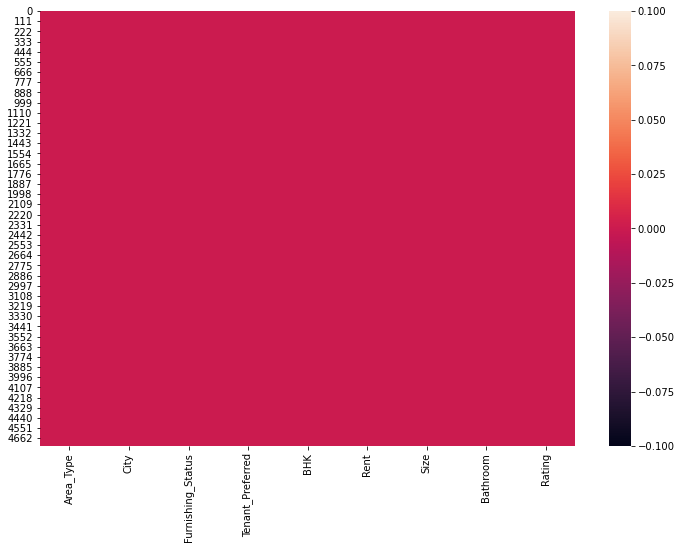

In [15]:
sns.heatmap(data.isnull())



,Area_Type,City,Furnishing_Status,Tenant_Preferred,BHK,Rent,Size,Bathroom,Rating
0,Super Area,Kolkata,Unfurnished,1,2.0,10000.0,1100.0,2.0,1.0
1,Super Area,Kolkata,Semi-Furnished,1,2.0,20000.0,800.0,1.0,1.0
2,Super Area,Kolkata,Semi-Furnished,1,2.0,17000.0,1000.0,1.0,3.0
3,Super Area,Kolkata,Unfurnished,1,2.0,10000.0,800.0,1.0,2.0
4,Carpet Area,Kolkata,Unfurnished,0,2.0,7500.0,850.0,1.0,4.0


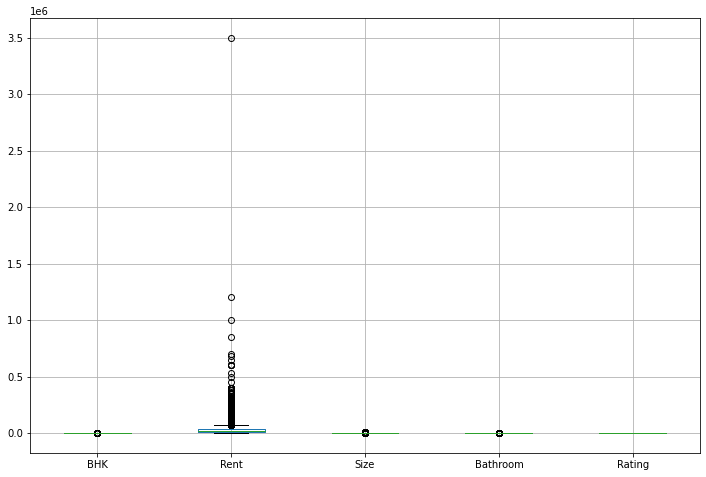

In [16]:
data.boxplot()
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1
IQR
data = data[~((data) > (q3 + (1.5 * IQR))).any(axis=1)]
data.head()


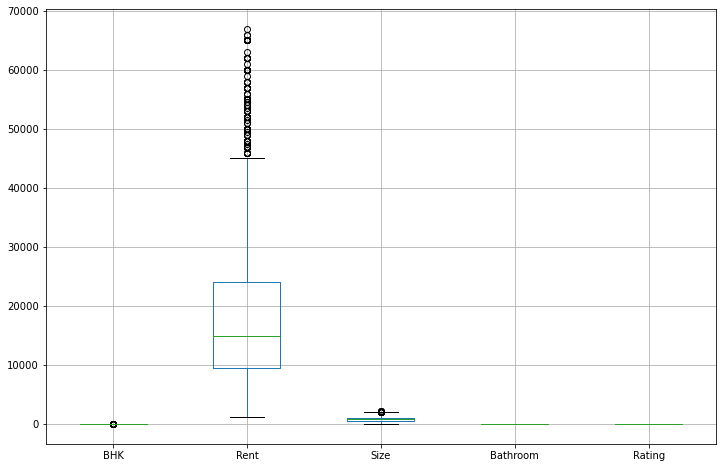

In [18]:
data.boxplot()

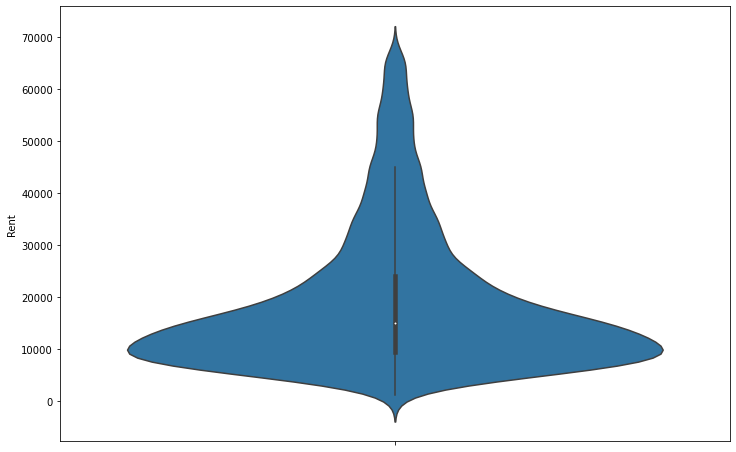

In [19]:
sns.violinplot(y = data.Rent)

Text(0, 0.5, 'Number of Unfurnished Rooms Location Wise')

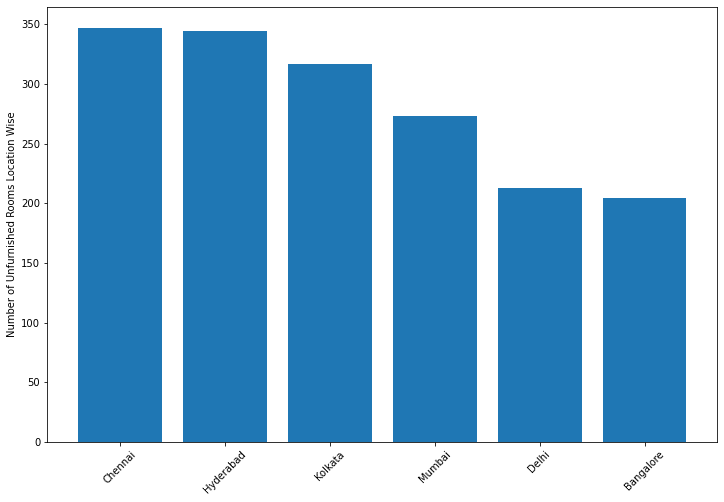

In [20]:
plt.bar(x=data[data['Furnishing_Status'] == 'Unfurnished'].groupby('City')['Furnishing_Status'].agg('count').sort_values(ascending=False).head(10).index,height=data[data['Furnishing_Status'] =='Unfurnished'].groupby('City')['Furnishing_Status'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=45)
plt.ylabel('Number of Unfurnished Rooms Location Wise')

Text(0, 0.5, 'Number of Semi furnished Rooms Location Wise')

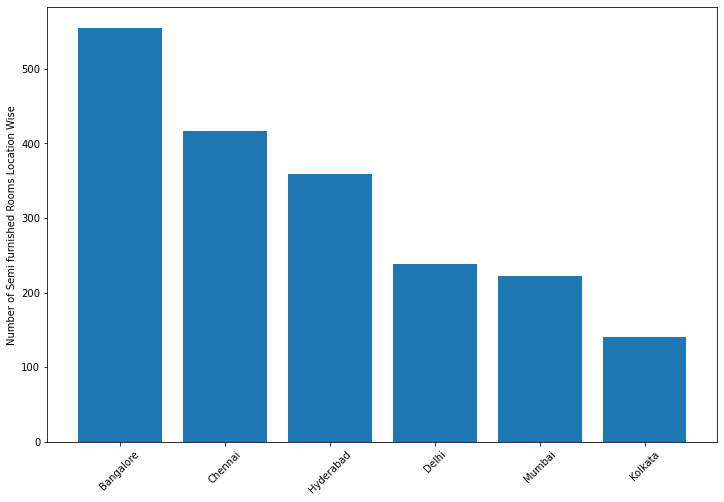

In [21]:
plt.bar(x=data[data['Furnishing_Status'] == 'Semi-Furnished'].groupby('City')['Furnishing_Status'].agg('count').sort_values(ascending=False).head(10).index,height=data[data['Furnishing_Status'] =='Semi-Furnished'].groupby('City')['Furnishing_Status'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=45)
plt.ylabel('Number of Semi furnished Rooms Location Wise')

Text(0, 0.5, 'Number of furnished Rooms Location Wise')

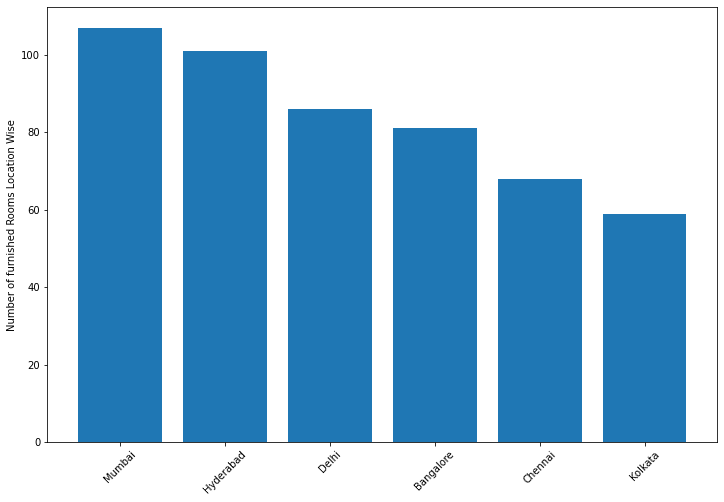

In [22]:
plt.bar(x=data[data['Furnishing_Status'] == 'Furnished'].groupby('City')['Furnishing_Status'].agg('count').sort_values(ascending=False).head(10).index,height=data[data['Furnishing_Status'] =='Furnished'].groupby('City')['Furnishing_Status'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=45)
plt.ylabel('Number of furnished Rooms Location Wise')

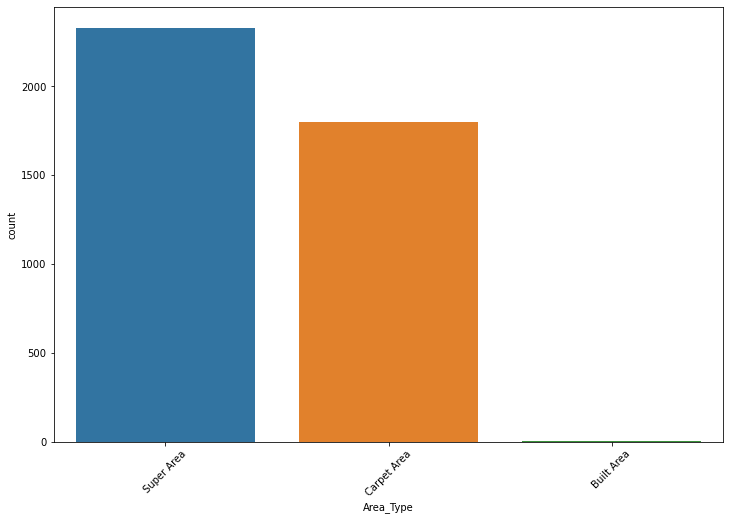

In [23]:
sns.countplot(data.Area_Type)
plt.xticks(rotation = 45)
plt.show()

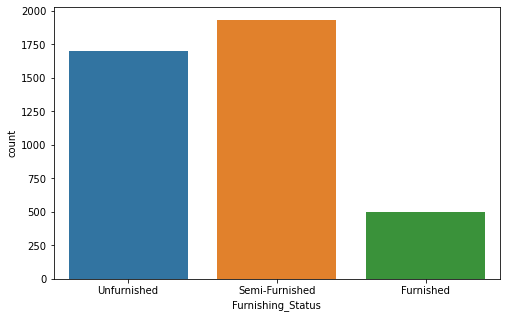

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data.Furnishing_Status)
plt.show()

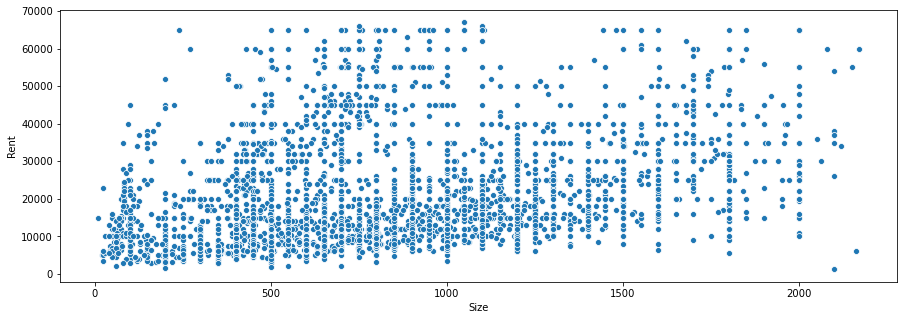

In [25]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Size", y="Rent", data=data)
plt.show()

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

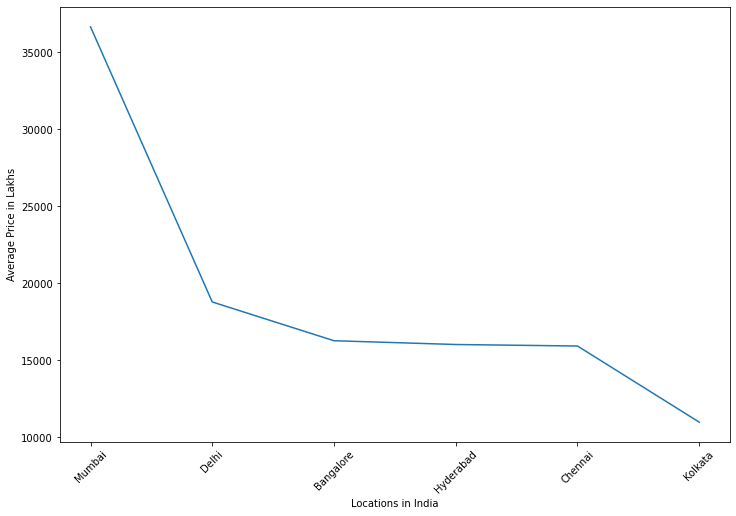

In [26]:
plt.plot(data.groupby(by='City')['Rent'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('Locations in India')
plt.ylabel('Average Price in Lakhs')
plt.xticks(rotation=45)

In [27]:
data['Per_Sqaureft_Size'] = data['Rent']/data['Size']

Text(0, 0.5, 'Average Price / Sq.ft in Lakhs')

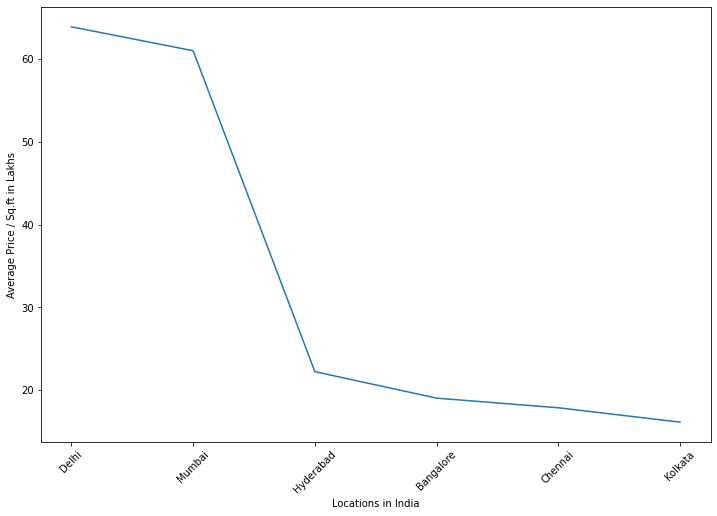

In [28]:
plt.plot(data.groupby(by='City')['Per_Sqaureft_Size'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations in India')
plt.ylabel('Average Price / Sq.ft in Lakhs')

In [29]:
data= data.drop('Per_Sqaureft_Size',axis=1)

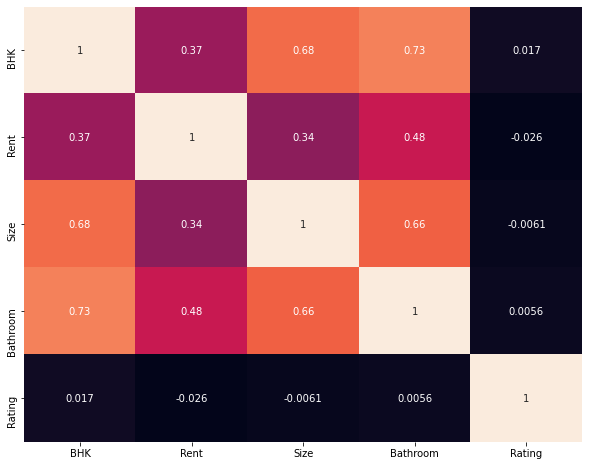

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cbar=False)
plt.show()

In [31]:
data.head()
data_cat=data.select_dtypes(exclude=np.number)
data_num=data.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [32]:
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head() 

,index,BHK,Rent,Size,Bathroom,Rating
0,0,0.10703,-0.656238,0.611169,0.360615,-1.407909
1,1,0.10703,0.089722,-0.091651,-1.179925,-1.407909
2,2,0.10703,-0.134066,0.376895,-1.179925,0.006505
3,3,0.10703,-0.656238,-0.091651,-1.179925,-0.700702
4,4,0.10703,-0.842728,0.025485,-1.179925,0.713713


In [33]:
data_scaled=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
data_scaled.head() 

,BHK,Rent,Size,Bathroom,Rating,Area_Type,City,Furnishing_Status,Tenant_Preferred
0,0.10703,-0.656238,0.611169,0.360615,-1.407909,Super Area,Kolkata,Unfurnished,1
1,0.10703,0.089722,-0.091651,-1.179925,-1.407909,Super Area,Kolkata,Semi-Furnished,1
2,0.10703,-0.134066,0.376895,-1.179925,0.006505,Super Area,Kolkata,Semi-Furnished,1
3,0.10703,-0.656238,-0.091651,-1.179925,-0.700702,Super Area,Kolkata,Unfurnished,1
4,0.10703,-0.842728,0.025485,-1.179925,0.713713,Carpet Area,Kolkata,Unfurnished,0


In [34]:
# Reference Table For Displaying Reason for Selecting
data_encoded_refernce=pd.get_dummies(data,columns=['Area_Type','City','Furnishing_Status'])
data_encoded_refernce.head() 

,Tenant_Preferred,BHK,Rent,Size,Bathroom,Rating,Area_Type_Built Area,Area_Type_Carpet Area,Area_Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing_Status_Furnished,Furnishing_Status_Semi-Furnished,Furnishing_Status_Unfurnished
0,1,2.0,10000.0,1100.0,2.0,1.0,0,0,1,0,0,0,0,1,0,0,0,1
1,1,2.0,20000.0,800.0,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0
2,1,2.0,17000.0,1000.0,1.0,3.0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,2.0,10000.0,800.0,1.0,2.0,0,0,1,0,0,0,0,1,0,0,0,1
4,0,2.0,7500.0,850.0,1.0,4.0,0,1,0,0,0,0,0,1,0,0,0,1


In [35]:
data_encoded_scaled=pd.get_dummies(data_scaled,columns=['Area_Type','City','Furnishing_Status'])
data_encoded_scaled.head()

,BHK,Rent,Size,Bathroom,Rating,Tenant_Preferred,Area_Type_Built Area,Area_Type_Carpet Area,Area_Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing_Status_Furnished,Furnishing_Status_Semi-Furnished,Furnishing_Status_Unfurnished
0,0.10703,-0.656238,0.611169,0.360615,-1.407909,1,0,0,1,0,0,0,0,1,0,0,0,1
1,0.10703,0.089722,-0.091651,-1.179925,-1.407909,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0.10703,-0.134066,0.376895,-1.179925,0.006505,1,0,0,1,0,0,0,0,1,0,0,1,0
3,0.10703,-0.656238,-0.091651,-1.179925,-0.700702,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0.10703,-0.842728,0.025485,-1.179925,0.713713,0,0,1,0,0,0,0,0,1,0,0,0,1


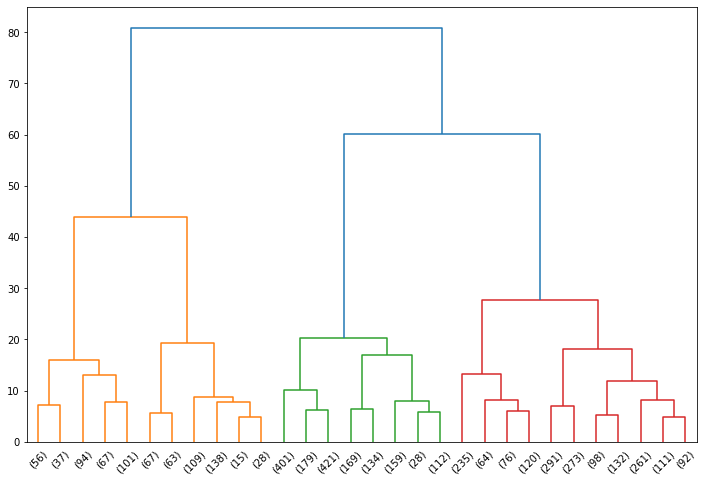

In [36]:
d1 = data_encoded_scaled.copy()
data_cluster=data_encoded_refernce.copy()
cls=d1[['Size','Rent']]
mergings=linkage(cls,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show() 

In [37]:
cluster=cut_tree(mergings,n_clusters=3)
cluster_cut = pd.Series(cut_tree(mergings,n_clusters=3).reshape(-1))
cluster_cut.value_counts()



0    1753
1    1603
2     775
dtype: int64

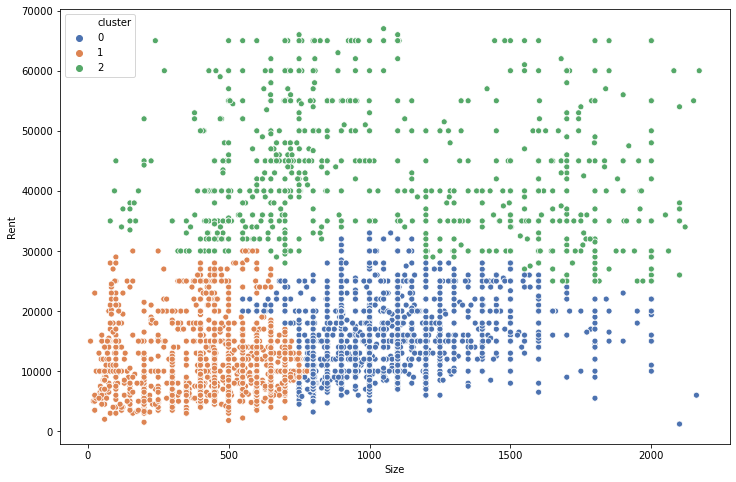

In [38]:
d1['cluster']=cluster
data_cluster['cluster']=cluster
sns.scatterplot(y=data.Rent,x=data['Size'],hue=data_cluster['cluster'],palette='deep')


In [39]:
#!pip install -U threadpoolctl

In [40]:
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)





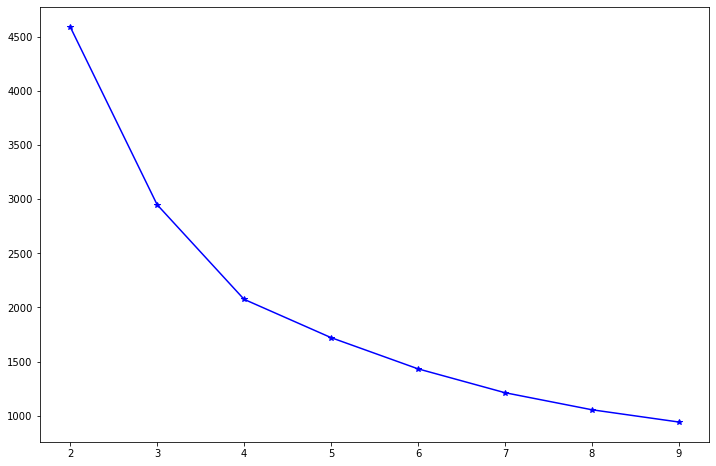

In [41]:
plt.plot(range(2,10),ssd,marker='*',color='b')

In [42]:
from sklearn.metrics import silhouette_score

score = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    labels = kmeans.labels_
    ss = silhouette_score(d1,labels)
    score.append(ss)

Text(0.5, 0, 'no of clusters')

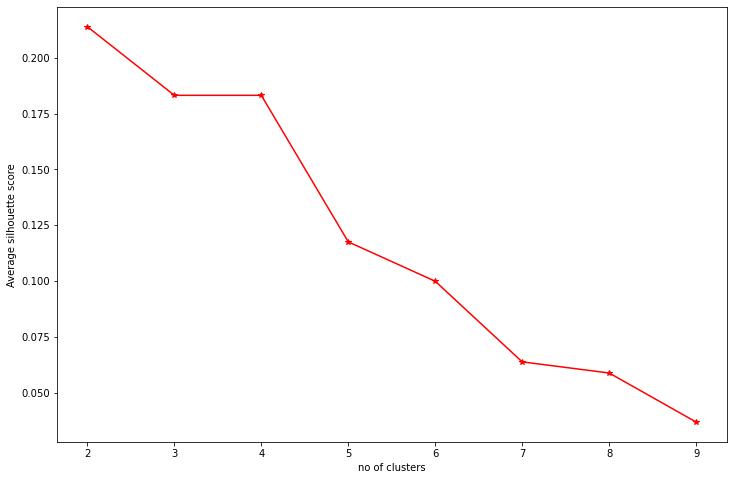

In [43]:
plt.plot(range(2,10),score,marker='*',color='r')
plt.ylabel('Average silhouette score')
plt.xlabel('no of clusters')

In [44]:
def svisualizer(x, ncluster):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    km = KMeans(n_clusters=ncluster, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(x)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0

    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()	

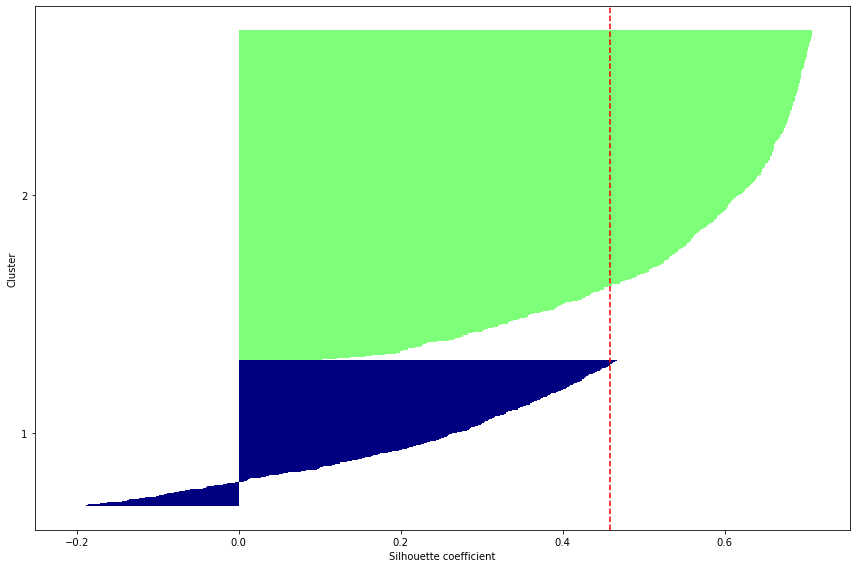

In [45]:
svisualizer(cls,2)

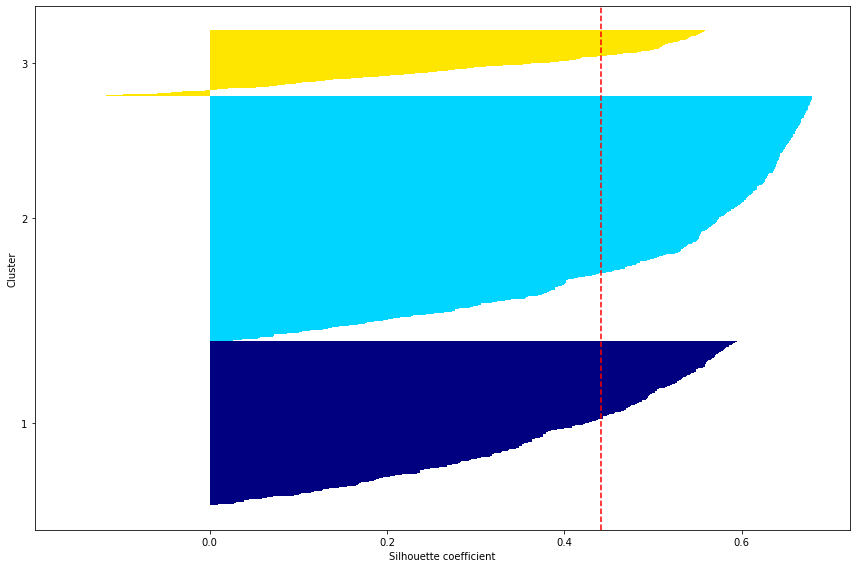

In [46]:
svisualizer(cls,3)

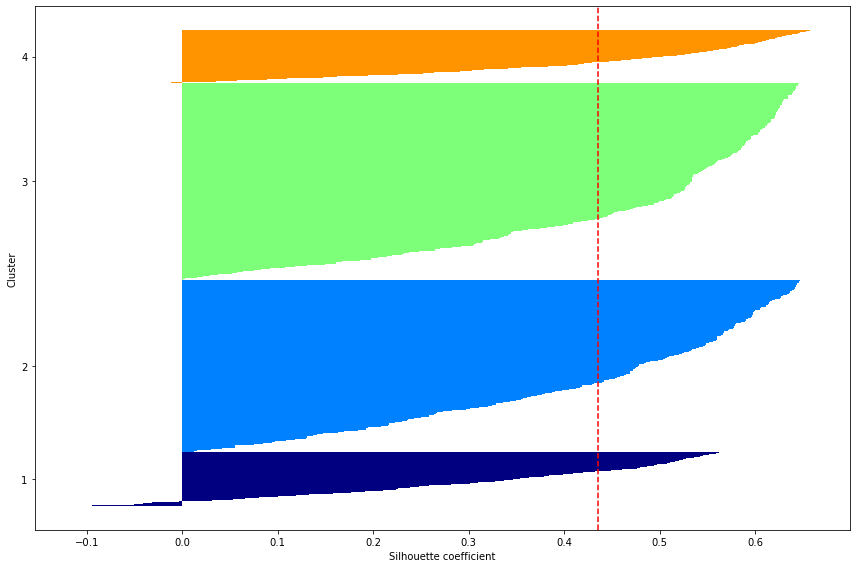

In [47]:
svisualizer(cls,4)

In [48]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_encoded_refernce)
data_cluster['kmeans_cluster']=cluster_kmeans
data_cluster.head()
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4131 entries, 0 to 4745
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Tenant_Preferred                  4131 non-null   object 
 1   BHK                               4131 non-null   float64
 2   Rent                              4131 non-null   float64
 3   Size                              4131 non-null   float64
 4   Bathroom                          4131 non-null   float64
 5   Rating                            4131 non-null   float64
 6   Area_Type_Built Area              4131 non-null   uint8  
 7   Area_Type_Carpet Area             4131 non-null   uint8  
 8   Area_Type_Super Area              4131 non-null   uint8  
 9   City_Bangalore                    4131 non-null   uint8  
 10  City_Chennai                      4131 non-null   uint8  
 11  City_Delhi                        4131 non-null   uint8  
 12  City_H

In [49]:
df3 = data_cluster.iloc[:,[0,1,2,3,4,5,19]]

In [51]:
df4 = df3.groupby(by='kmeans_cluster')
df4[['BHK','Size','Bathroom','Rent','Rating']].mean()

,BHK,Size,Bathroom,Rent,Rating
kmeans_cluster,,,,,
0,1.739726,727.666145,1.546380,10577.329550,3.011742
1,2.294505,1019.448352,2.261538,49380.443956,2.896703
2,2.197145,1019.959857,2.065120,25118.772525,2.981267


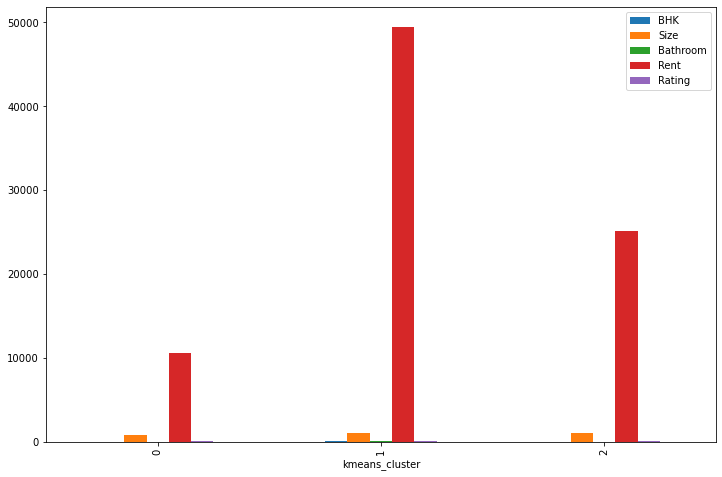

In [52]:
df4[['BHK','Size','Bathroom','Rent','Rating']].mean().plot.bar()
plt.show()

In [53]:
def cluster_plot(data, nclusters):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    X = data.copy()
    cols = list(X.columns)
    km = KMeans(n_clusters=nclusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)


    # Visualize it:
    plt.figure(figsize=(8,6))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

    # plot the centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

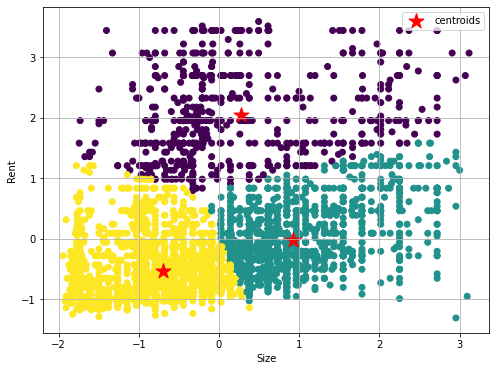

In [54]:
cluster_plot(cls,3)

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
dbscan = DBSCAN(eps=0.25,min_samples=4)
dbscan.fit(cls)
pd.Series(dbscan.labels_).value_counts()

 0    4091
-1      16
 1      11
 3       5
 2       4
 4       4
dtype: int64

In [57]:
lbl = pd.Series(dbscan.labels_)
lbl.loc[lbl >= 0] = 0
lbl.value_counts()

 0    4115
-1      16
dtype: int64

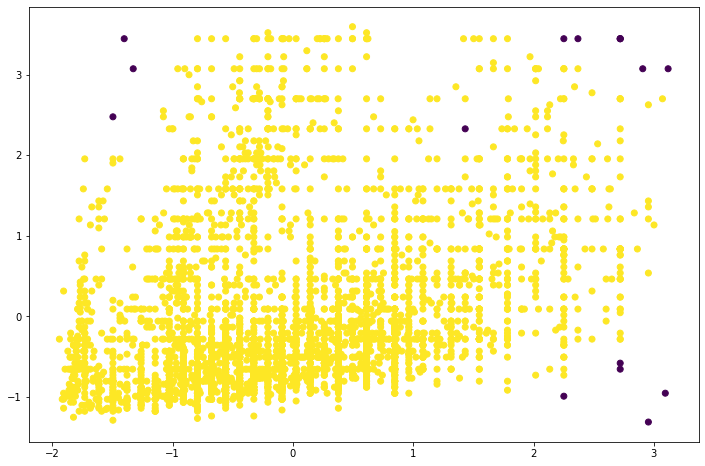

In [58]:
plt.scatter(cls['Size'],cls['Rent'],c=lbl)

In [59]:
from sklearn.decomposition import PCA

In [60]:
d2 = data_num_scaled.drop(['index'],axis=1)

In [61]:
d2.head()

,BHK,Rent,Size,Bathroom,Rating
0,0.10703,-0.656238,0.611169,0.360615,-1.407909
1,0.10703,0.089722,-0.091651,-1.179925,-1.407909
2,0.10703,-0.134066,0.376895,-1.179925,0.006505
3,0.10703,-0.656238,-0.091651,-1.179925,-0.700702
4,0.10703,-0.842728,0.025485,-1.179925,0.713713


In [62]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(d2)
print(np.cumsum(pca.explained_variance_ratio_*100))

[ 53.28889752  73.35141785  88.07528177  94.87345297 100.        ]


In [63]:
pca=PCA(n_components=2)
pca.fit_transform(d2)
print(pca.explained_variance_ratio_*100)

[53.28889752 20.06252033]


In [64]:
components = pca.components_.T
pd.DataFrame(components,index=d2.columns,columns=['PC1','PC2'])

,PC1,PC2
BHK,0.536641,-0.042627
Rent,0.382127,0.091731
Size,0.514356,-0.011564
Bathroom,0.549030,-0.012063
Rating,-0.000395,-0.994731


In [65]:
data_pca=pd.DataFrame(pca.transform(d2),columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,0.319574,1.324313
1,-0.602676,1.419452
2,-0.447751,-0.013456
3,-0.888007,0.647544
4,-0.899580,-0.777880
...,...,...
4126,0.341600,1.361236
4127,3.556587,0.647082
4128,3.425809,-0.712050
4129,2.564647,1.492177


In [66]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_pca)
data_pca['km_cluster_pca']=cluster_kmeans

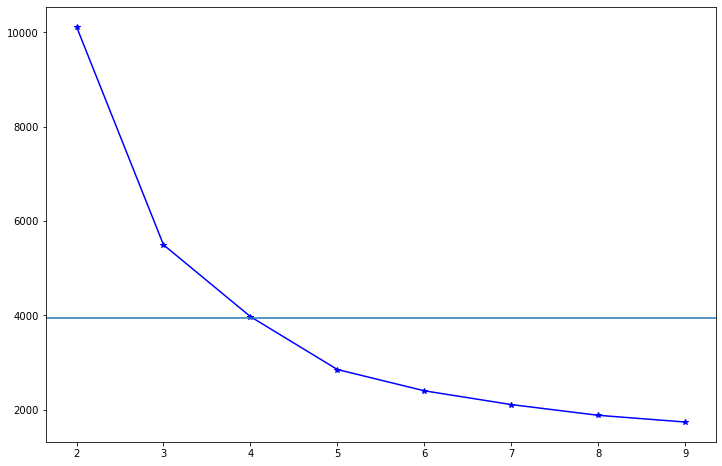

In [74]:
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)

plt.plot(range(2,10),ssd,marker='*',color='b')
plt.axhline(3950)
plt.show()

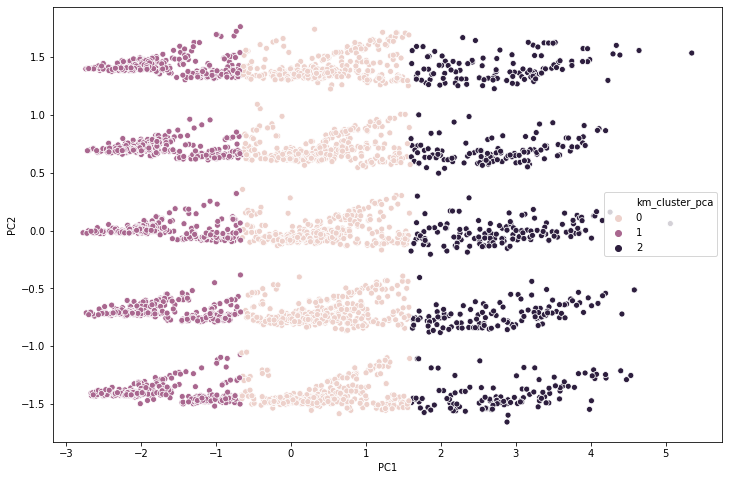

In [75]:
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['km_cluster_pca'])

In [76]:
model=NearestNeighbors(metric='cosine')
model.fit(data_encoded_scaled)

NearestNeighbors(metric='cosine')

In [77]:
selected=7

In [78]:
data_encoded_scaled.iloc[selected].values[0:8]

array([-1.3192363628246535, -1.0292178815932393, -1.3801548994370765,
       -1.179924644193796, 1.4209201100643423, 0, 0, 0], dtype=object)

In [79]:
dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=6)
index

array([[  7, 350, 360, 501, 225, 160]], dtype=int64)

In [80]:
suggest=[]
for x in index:
    suggest.append(x)
suggest 

[array([  7, 350, 360, 501, 225, 160], dtype=int64)]

In [81]:
data_encoded_refernce = data_encoded_refernce.reset_index()
data_encoded_refernce = data_encoded_refernce.drop('index',axis=1)

In [ ]:
INTEREST

In [82]:
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,BHK,Rent,Size,Bathroom,Rating,Area_Type_Super Area,City_Kolkata,Furnishing_Status_Unfurnished
7,1.0,5000.0,250.0,1.0,5.0,1,1,1


In [83]:
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,BHK,Rent,Size,Bathroom,Rating,Area_Type_Super Area,City_Kolkata,Furnishing_Status_Unfurnished
7,1.0,5000.0,250.0,1.0,5.0,1,1,1
350,1.0,6500.0,450.0,1.0,5.0,1,1,1
360,1.0,5000.0,420.0,1.0,4.0,1,1,1
501,1.0,3300.0,175.0,1.0,5.0,1,1,1
225,1.0,3000.0,160.0,1.0,5.0,1,1,1
160,1.0,3500.0,120.0,1.0,5.0,1,1,1
